Вычислить численно с точностью *eps=10^-6* значения *{yi}[i=1,6]* определённого интеграла 

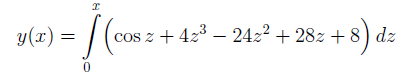

в точках *{x_i}[i=1,6] = {0,1,2,3,4,5}*. Используя полученные значения *y_i* в качестве компонент правой части *y* системы линейных алгебраических уравнений

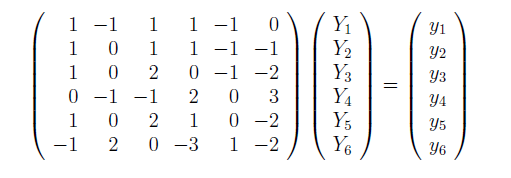

найти решение *Y* последней. Оценить в 1-норме относительную ошибку *δY* полученного решения, допущенную из-за приближённого вычисления интеграла *y(x)* 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return np.cos(x) + 4 * x**3 - 24 * x**2 + 28 * x + 8

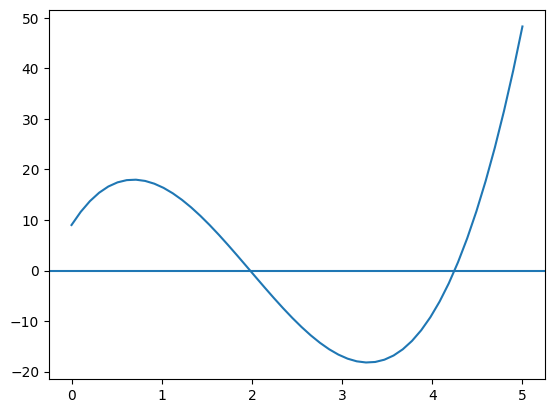

In [3]:
x=np.linspace(0,5)
y=f(x)
plt.axhline(0)
plt.plot(x,y)

In [4]:
def simpson_formula(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    return h * (y[0] + 2 * np.sum(y[2:-1:2]) + 4 * np.sum(y[1:-1:2])) / 3

In [5]:
def simpson_func(f, a, b, eps):
    err = eps + 1
    n = 2
    I_n = simpson_formula(f, a, b, n)
    while err >= eps:
        I_2n = simpson_formula(f, a, b, 2 * n)
        err = np.fabs(I_2n - I_n) / 15
        I_n = I_2n
        n *= 2
    return I_n 

In [6]:
eps = 1e-6
x_i = np.array([0, 1, 2, 3, 4, 5], dtype=float)

In [7]:
y_i = np.array([np.round(simpson_func(f, 0, xi, eps), 6) for xi in x_i], dtype=float)
for i in range(len(y_i)):
    print(f'y_{i+1} = {y_i[i]}')

y_1 = 0.0
y_2 = 15.84146
y_3 = 24.909306
y_4 = 15.141128
y_5 = -0.756791
y_6 = 14.041066


In [25]:
def fact(n):
    if n == 0:
        return 1
    ans = 1
    for i in range(2, n+1):
        ans *= i
    return ans

def sinus(x, eps):
    x_i = x
    ans = x_i
    n = 1
    while np.fabs(x_i) >= eps:
        x_i = (-1)**n * x**(2*n+1) / fact(2*n+1)
        ans += x_i
        n += 1
    
    return ans

In [39]:
A = np.array([
        [1, -1, 1, 1, -1, 0],
        [1, 0, 1, 1, -1, -1],
        [1, 0, 2, 0, -1, -2],
        [0, -1, -1, 2, 0, 3],
        [1, 0, 2, 1, 0, -2],
        [-1, 2, 0, -3, 1, -2]
    ], dtype=float)

In [40]:
def LU_func(matr):
    if not len(matr):
        return  ([], [])

    A = np.asarray(matr, dtype='float64')
    L = np.asarray([[0] * len(A[0])] * len(A), dtype='float64')
    U = L.copy()
    for i in range(len(L)):
        L[i][i] = 1
    
    for i in range(len(A)):
        for j in range(len(A[0])):
            total = sum(L[i][p]*U[p][j] for p in range(j))
            if i <= j:
                U[i][j] = A[i][j] - total
            else:
                L[i][j] = (A[i][j] - total) / U[j][j]

    return (L, U)

In [49]:
L_, U_ = LU_func(matr)
print(f"L:\n{L_}\n")
print(f"U:\n{U_}")

L:
[[1.         0.         0.         0.         0.         0.        ]
 [0.13008424 1.         0.         0.         0.         0.        ]
 [0.13357892 0.10215827 1.         0.         0.         0.        ]
 [0.08111272 0.06360711 0.05583947 1.         0.         0.        ]
 [0.00194406 0.10631256 0.12083205 0.06092653 1.         0.        ]
 [0.06021124 0.07630052 0.14032343 0.04214306 0.09912511 1.        ]]

U:
[[6.66569969 0.29892755 0.79892808 0.22411533 0.36718418 0.46099712]
 [0.         5.99507744 0.51648153 0.72112264 0.17064586 0.25832646]
 [0.         0.         5.85450592 0.79778269 0.64670443 0.05433063]
 [0.         0.         0.         6.45867509 0.1457866  0.54330198]
 [0.         0.         0.         0.         6.24545697 0.41688528]
 [0.         0.         0.         0.         0.         6.21806881]]


In [50]:
print('Невязка ||matr - LU||_inf =',  np.max(np.fabs(matr-L_ @ U_)))

Невязка ||matr - LU||_inf = 1.1102230246251565e-16


In [41]:
def solve(L, U, y):
    Z = np.linalg.solve(L, y)
    print(f'Z:\n{Z}')
    Y = np.linalg.solve(U, Z)
    return Y

In [42]:
L, U = LU_func(A)

In [43]:
print(f'L:\n{L}')
print(f'\nU:\n{U}')

L:
[[ 1.  0.  0.  0.  0.  0.]
 [ 1.  1.  0.  0.  0.  0.]
 [ 1.  1.  1.  0.  0.  0.]
 [ 0. -1. -1.  1.  0.  0.]
 [ 1.  1.  1.  1.  1.  0.]
 [-1.  1.  1. -1.  0.  1.]]

U:
[[ 1. -1.  1.  1. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.]
 [ 0.  0.  1. -1.  0. -1.]
 [ 0.  0.  0.  1.  0.  1.]
 [ 0.  0.  0.  0.  1. -1.]
 [ 0.  0.  0.  0.  0.  1.]]


In [27]:
Y = solve(L, U, y_i)

Z:
[  0.        15.84146    9.067846  40.050434 -65.716531  29.182194]


In [28]:
print(f'Y:\n{Y}')

Y:
[-51.497203  45.023654  49.11828   10.86824  -36.534337  29.182194]


In [34]:
condA = np.linalg.norm(A, 1) * np.linalg.norm(np.linalg.inv(A), 1)
print("Число обусловленности A:", condA)
deltay = len(y_i) * eps
deltaY = condA * (deltay / np.linalg.norm(y_i, 1))
print("Оценка относительной погрешности решения:", deltaY)

Число обусловленности A: 120.0
Оценка относительной погрешности решения: 1.0185352046295934e-05
